This notebook analyzes the experimental data from UV-Vis-Spectroscopy and gerenates plots

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import data from uv-vis/{name}.cvs
# Data format: nm;abs; e.g. 200,3; 0,000

# Analysis for glass samples (no catalyst) with methylene blue
light_times = ['0', '5', '15', '30', '60', '120', '180']

# Import data
glass_data = [pd.read_csv(f'uv-vis/Glas_{name}min.csv', sep=';', decimal=',', header=0, names=['nm', 'A']) for name in light_times]
catalyst_data = [pd.read_csv(f'uv-vis/TiO2_{name}min.csv', sep=';', decimal=',', header=0, names=['nm', 'A']) for name in light_times]
highlighter_data = pd.read_csv('uv-vis/Textmarker.csv', sep=';', decimal=',', header=0, names=['nm', 'A'])

# Remove data below 400 nm
glass_data = [data[data['nm'] >= 400] for data in glass_data]
catalyst_data = [data[data['nm'] >= 400] for data in catalyst_data]

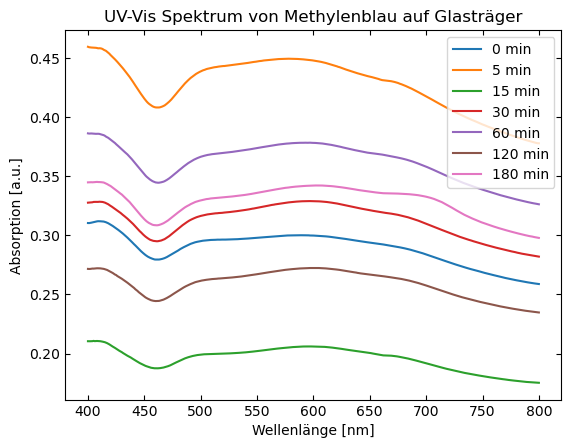

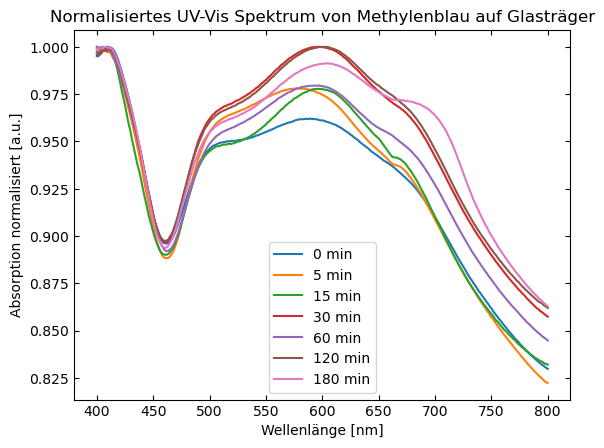

In [3]:
# Plot glass data in one plot
fig, ax = plt.subplots()
for data in glass_data:
    ax.plot(data['nm'], data['A'])
ax.set_xlabel('Wellenlänge [nm]')
ax.set_ylabel('Absorption [a.u.]')
ax.set_title('UV-Vis Spektrum von Methylenblau auf Glasträger')
 # Add ticks to the right and top
ax.tick_params(direction='in', top=True, right=True)
ax.legend(['0 min', '5 min', '15 min', '30 min', '60 min', '120 min', '180 min'])
plt.savefig('uv-vis/spektrum-glas.png')
plt.show()

# Normalize data

glass_normalized = [{'nm': data['nm'], 'A': data['A'] / data['A'].max()} for data in glass_data]

# Plot normalized glass data in one plot
fig, ax = plt.subplots()
for data in glass_normalized:
    ax.plot(data['nm'], data['A'])
ax.set_xlabel('Wellenlänge [nm]')
ax.set_ylabel('Absorption normalisiert [a.u.]')
ax.set_title('Normalisiertes UV-Vis Spektrum von Methylenblau auf Glasträger')
 # Add ticks to the right and top
ax.tick_params(direction='in', top=True, right=True)
ax.legend(['0 min', '5 min', '15 min', '30 min', '60 min', '120 min', '180 min'])
plt.savefig('uv-vis/spektrum-glas-normalized.png')
plt.show()

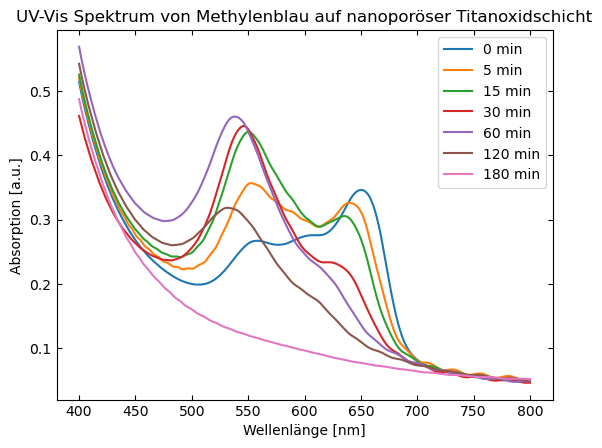

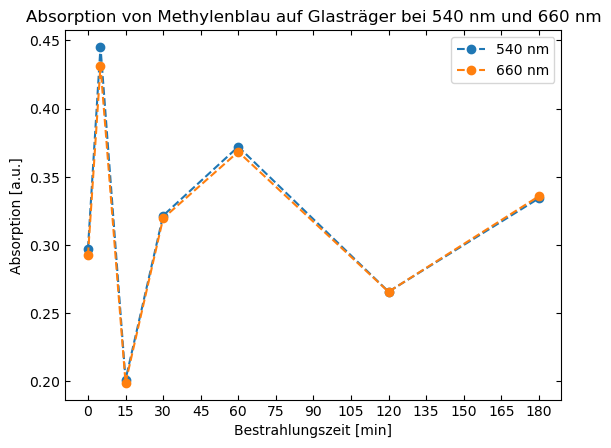

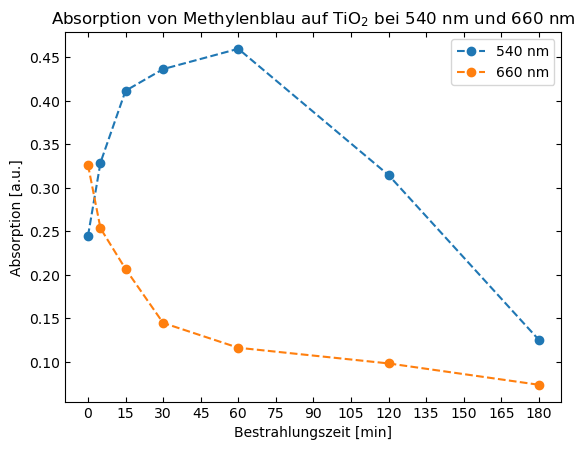

In [10]:
# Analysis for samples with catalyst with methylene blue

# Plot data in one plot
fig, ax = plt.subplots()
for data in catalyst_data:
    ax.plot(data['nm'], data['A'])
ax.set_xlabel('Wellenlänge [nm]')
ax.set_ylabel('Absorption [a.u.]')
ax.set_title('UV-Vis Spektrum von Methylenblau auf nanoporöser Titanoxidschicht')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
ax.legend(['0 min', '5 min', '15 min', '30 min', '60 min', '120 min', '180 min'])
plt.savefig('uv-vis/spektrum-tio2.png')
plt.show()

# Plot the absorbance at two wavelengths over time
l1, l2 = 540, 660
fig, ax = plt.subplots()
l1_abs = [data[data['nm'] == l1]['A'].values[0] for data in glass_data]
l2_abs = [data[data['nm'] == l2]['A'].values[0] for data in glass_data]
ax.plot([int(time) for time in light_times], l1_abs, 'o--', label=f'{l1} nm')
ax.plot([int(time) for time in light_times], l2_abs, 'o--', label=f'{l2} nm')
ax.set_xlabel('Bestrahlungszeit [min]')
ax.set_ylabel('Absorption [a.u.]')
ax.set_title(f'Absorption von Methylenblau auf Glasträger bei {l1} nm und {l2} nm')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15)) # set tick intervalls
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
ax.legend()
plt.savefig('uv-vis/absorption-glas-2peaks.png')


fig, ax = plt.subplots()
ax.plot([int(time) for time in light_times], [data[data['nm'] == l1]['A'].values[0] for data in catalyst_data], 'o--', label=f'{l1} nm')
ax.plot([int(time) for time in light_times], [data[data['nm'] == l2]['A'].values[0] for data in catalyst_data], 'o--', label=f'{l2} nm')
ax.set_xlabel('Bestrahlungszeit [min]')
ax.set_ylabel('Absorption [a.u.]')
ax.set_title(f'Absorption von Methylenblau auf TiO$_2$ bei {l1} nm und {l2} nm')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15)) # set tick intervalls
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
ax.legend()
plt.savefig('uv-vis/absorption-tio2-2peaks.png')

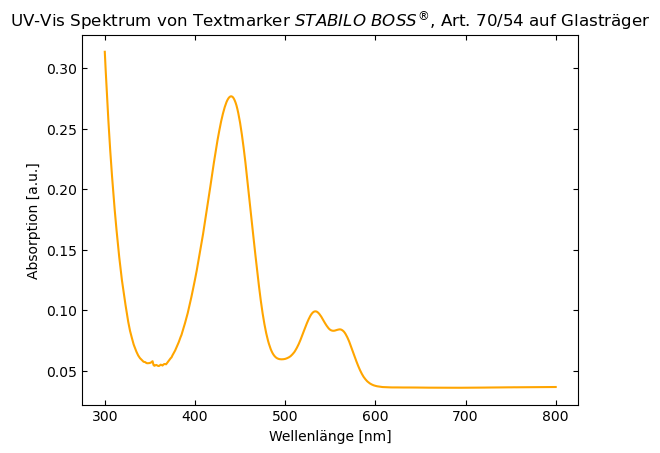

In [14]:
# UV-Vis Spektrum von Textmarker
fig, ax = plt.subplots()
highlighter_data_zoom = highlighter_data[highlighter_data['nm'] >= 300]
ax.plot(highlighter_data_zoom['nm'], highlighter_data_zoom['A'], color='orange')
ax.set_xlabel('Wellenlänge [nm]')
ax.set_ylabel('Absorption [a.u.]')
ax.set_title('UV-Vis Spektrum von Textmarker $STABILO$ $BOSS^®$, Art. 70/54')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('uv-vis/spektrum-textmarker.png')
plt.show()